### Preprocessing Data Loading -> Train (10Î™Ö) / Test (2Î™Ö)

In [63]:
import os
import numpy as np
import pandas as pd

# ----------------------------------------
# Ïã§Ìóò ÏÑ∏ÌåÖ
# ----------------------------------------

subject_files_map = {
    'P02': [3, 4, 5, 6, 7, 8, 9, 10, 11],
    'P03': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'P04': [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11],
    'P08': [0, 1, 2, 4, 5, 6, 7, 8, 10, 11],
    'P10': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'P11': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'P12': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'P13': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'P16': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'P19': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'P21': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'P22': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
}

# ÏÇ¨Ïö©Ïûê Í∏∞Ï§Ä Î∂ÑÌï†
train_subjects = ['P02', 'P10', 'P03', 'P04', 'P08', 'P19', 'P21', 'P12', 'P13', 'P16']
test_subjects = ['P11', 'P22']

# ÌôúÎèô Ïù¥Î¶Ñ ‚Üí ÎùºÎ≤®
activity_map = {
    0: 'Open the faucet',
    1: 'Rinsing the dish',
    2: 'Put dishes on a drying rack',
    3: 'Close the faucet',
    4: 'Chopping',
    5: 'Grinding',
    6: 'Scissoring',
    7: 'Pouring',
    8: 'Stir-frying',
    9: 'Roasting',
    10: 'Turn on the stove',
    11: 'Turn off the stove'
}

# ----------------------------------------
# ÏÉòÌîå ÏÉùÏÑ± Ìï®Ïàò
# ----------------------------------------

def create_samples(data, window_size=50, overlap=0.5):
    step = int(window_size * (1 - overlap))
    samples = []
    for start in range(0, len(data) - window_size + 1, step):
        end = start + window_size
        samples.append(data[start:end, 1:])  # LocalTimestamp Ï†úÏô∏
    return np.array(samples)

def create_labels(num_samples, activity_index):
    return np.full(num_samples, activity_index)

# ----------------------------------------
# CSV Î∂àÎü¨Ïò§Í∏∞ Î∞è ÏÉòÌîå/ÎùºÎ≤® ÏÉùÏÑ±
# ----------------------------------------

def process_subjects(subject_ids):
    samples_all = []
    labels_all = []
    
    for subject_id in subject_ids:
        for activity_index in subject_files_map[subject_id]:
            # Î≤îÏ£º ÏΩîÎìú Í≥ÑÏÇ∞
            if 0 <= activity_index <= 3:
                category_code = 0
            elif 4 <= activity_index <= 7:
                category_code = 1
            else:
                category_code = 2

            file_path = f'./data/{subject_id}/{subject_id}-{activity_index}-{category_code}-pre.csv'
            if not os.path.exists(file_path):
                print(f"‚ùå Missing: {file_path}")
                continue
            
            df = pd.read_csv(file_path)
            data = df.to_numpy()
            samples = create_samples(data)
            labels = create_labels(len(samples), activity_index)

            samples_all.append(samples)
            labels_all.append(labels)
    
    if samples_all:
        return np.vstack(samples_all), np.concatenate(labels_all)
    else:
        return np.empty((0, 50, 9)), np.array([])

# ----------------------------------------
# Ïã§Ìñâ
# ----------------------------------------
np.random.seed(42)  # Ïû¨ÌòÑÏÑ± ÏúÑÌï¥ seed Í≥†Ï†ï

X_train, y_act_train = process_subjects(train_subjects)
X_test, y_act_test = process_subjects(test_subjects)

# Train ÏÖîÌîå
train_indices = np.random.permutation(len(X_train))
X_train = X_train[train_indices]
y_act_train = y_act_train[train_indices]

# Test ÏÖîÌîå
test_indices = np.random.permutation(len(X_test))
X_test = X_test[test_indices]
y_act_test = y_act_test[test_indices]

print("‚úÖ X_train:", X_train.shape)
print("‚úÖ y_act_train:", y_act_train.shape)
print("‚úÖ X_test:", X_test.shape)
print("‚úÖ y_act_test:", y_act_test.shape)


# NaN ÌôïÏù∏
print("üîç X_train contains NaN:", np.isnan(X_train).any())
print("üîç X_test  contains NaN:", np.isnan(X_test).any())


‚úÖ X_train: (26417, 50, 9)
‚úÖ y_act_train: (26417,)
‚úÖ X_test: (5732, 50, 9)
‚úÖ y_act_test: (5732,)
üîç X_train contains NaN: False
üîç X_test  contains NaN: False


In [64]:
for i in range(10):
    print(X_train[i][0])
    print(y_act_train[i])
    print('------------------------')

[  -0.637        -0.798         0.183       -30.53928571  -97.687
 -111.023         0.68805194    1.65052688    1.04639804]
2
------------------------
[-0.474      -0.142       0.194       2.777      -8.82       38.025
  1.76935291  0.53755295  2.08001566]
5
------------------------
[-0.876      -0.181       0.457      -7.263       5.646      -5.341
  1.91364384  0.42130496  2.32205391]
6
------------------------
[-1.05300000e+00 -2.18000000e-01 -2.00000000e-03  5.46300000e+00
  9.46000000e-01  3.10670000e+01  1.77902460e+00  5.71462989e-01
  2.15663218e+00]
6
------------------------
[ -0.239       -0.72         0.681      -17.548        0.244
 -15.32         1.78778911   0.44277397   2.70640421]
4
------------------------
[-0.016      -0.46        0.954      -4.211       1.556       6.409
  0.90363252  2.57691622  0.56598568]
9
------------------------
[ -0.103       -1.052        0.261       -0.793      -36.621
   8.606        1.00325775   2.85858893   0.67949879]
10
---------------

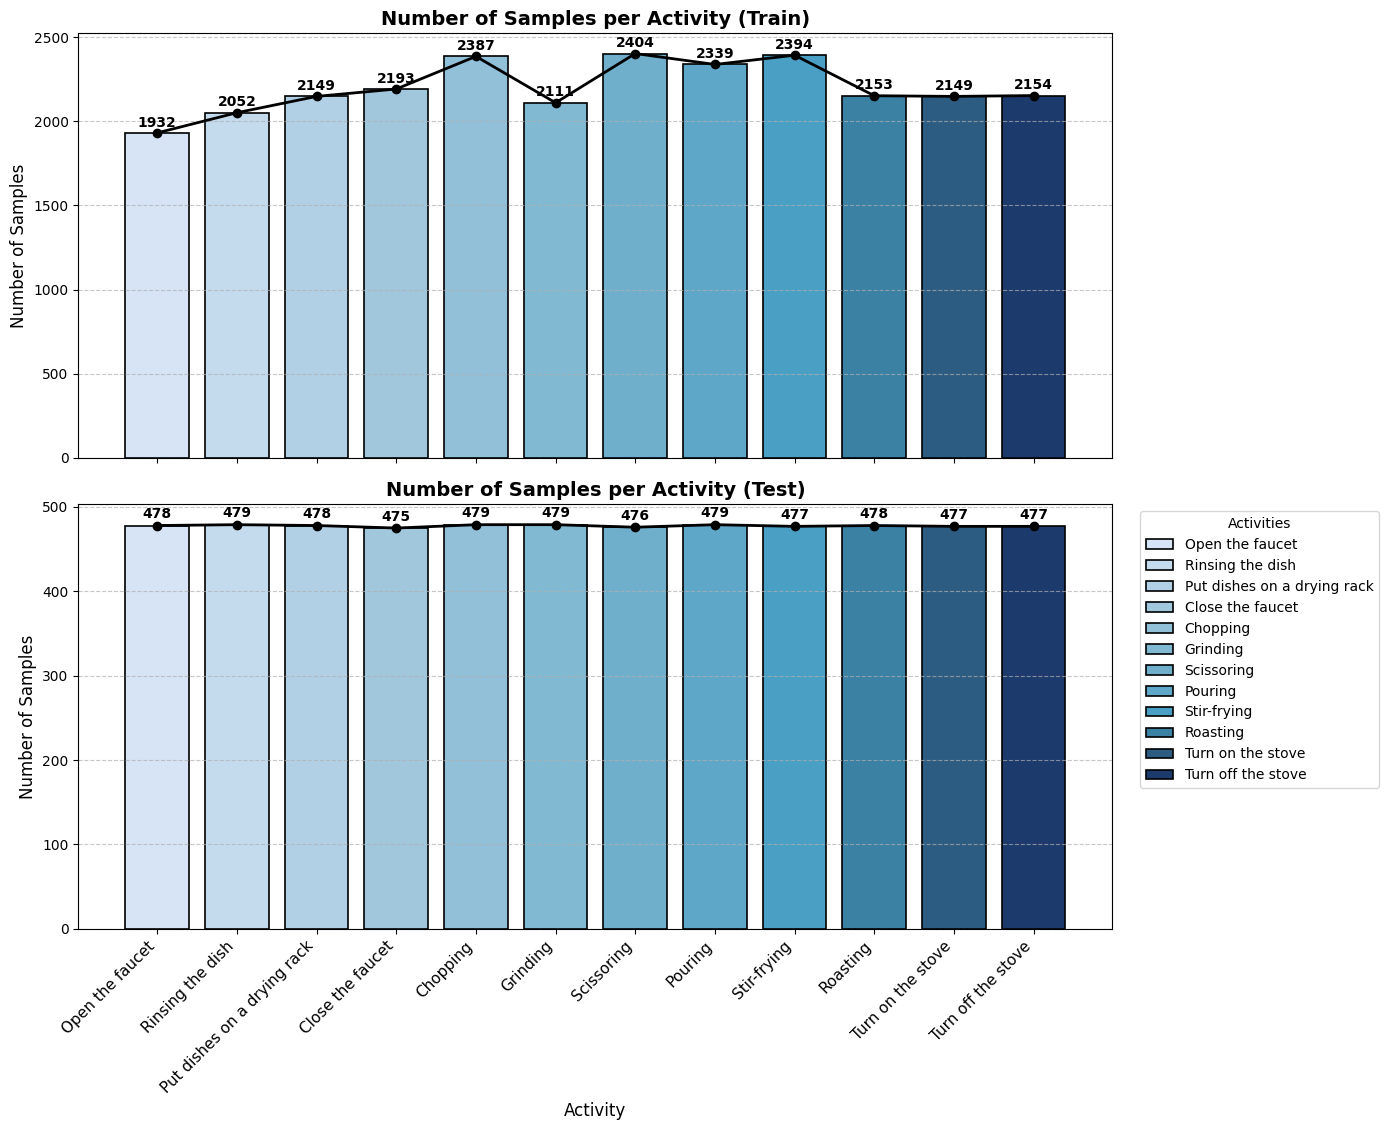

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# ÌôúÎèô Ïù¥Î¶Ñ
activity_list = [
    'Open the faucet',
    'Rinsing the dish',
    'Put dishes on a drying rack',
    'Close the faucet',
    'Chopping',
    'Grinding',
    'Scissoring',
    'Pouring',
    'Stir-frying',
    'Roasting',
    'Turn on the stove',
    'Turn off the stove'
]

# ÏÇ¨Ïö©Ïûê Ï†ïÏùò ÏÉâÏÉÅ
custom_user_colors = [
    (214/255, 228/255, 245/255),
    (196/255, 218/255, 237/255),
    (178/255, 208/255, 229/255),
    (161/255, 199/255, 221/255),
    (146/255, 192/255, 216/255),
    (129/255, 185/255, 210/255),
    (112/255, 175/255, 204/255),
    (95/255, 167/255, 200/255),
    (74/255, 160/255, 196/255),
    (58/255, 129/255, 164/255),
    (45/255, 92/255, 130/255),
    (29/255, 58/255, 109/255)
]

# Train/Test Î∂ÑÌï†Îêú Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏÉòÌîå Ïàò Í≥ÑÏÇ∞
train_counts = [np.sum(y_act_train == i) for i in range(len(activity_list))]
test_counts = [np.sum(y_act_test == i) for i in range(len(activity_list))]

# ÏãúÍ∞ÅÌôî
fig, ax = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# --- Train ---
bars_train = ax[0].bar(range(len(activity_list)), train_counts, color=custom_user_colors, edgecolor='black', linewidth=1.2)
for bar in bars_train:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2, yval + 20, int(yval),
               ha='center', va='bottom', fontsize=10, fontweight='bold')
ax[0].plot(range(len(activity_list)), train_counts, marker='o', color='black', linewidth=2)
ax[0].set_title('Number of Samples per Activity (Train)', fontsize=14, fontweight='bold')
ax[0].set_ylabel('Number of Samples', fontsize=12)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# --- Test ---
bars_test = ax[1].bar(range(len(activity_list)), test_counts, color=custom_user_colors, edgecolor='black', linewidth=1.2)
for bar in bars_test:
    yval = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width() / 2, yval + 5, int(yval),
               ha='center', va='bottom', fontsize=10, fontweight='bold')
ax[1].plot(range(len(activity_list)), test_counts, marker='o', color='black', linewidth=2)
ax[1].set_title('Number of Samples per Activity (Test)', fontsize=14, fontweight='bold')
ax[1].set_ylabel('Number of Samples', fontsize=12)
ax[1].set_xlabel('Activity', fontsize=12)
ax[1].set_xticks(range(len(activity_list)))
ax[1].set_xticklabels(activity_list, rotation=45, ha='right', fontsize=11)
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

# Î≤îÎ°Ä Ï∂îÍ∞Ä
ax[1].legend(bars_test, activity_list, title="Activities", fontsize=10, loc='upper left', bbox_to_anchor=(1.02, 1))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•

In [66]:
# Ï†ÄÏû• Ìè¥Îçî ÏÉùÏÑ±
os.makedirs('./pre_data/between', exist_ok=True)

# reshape: (N, 50, 9) ‚Üí (N, 450)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Ï†ÄÏû•
pd.DataFrame(X_train_flat).to_csv('./pre_data//between/X_train.csv', index=False)
pd.DataFrame(y_act_train).to_csv('./pre_data/between/y_act_train.csv', index=False, header=['label'])

pd.DataFrame(X_test_flat).to_csv('./pre_data/between/X_test.csv', index=False)
pd.DataFrame(y_act_test).to_csv('./pre_data/between/y_act_test.csv', index=False, header=['label'])

print("‚úÖ Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• ÏôÑÎ£å!")

‚úÖ Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• ÏôÑÎ£å!


### Same location Î≥ÄÍ≤Ω

In [67]:
# Î≥µÏÇ¨Î≥∏ ÏÉùÏÑ±
X_nogry_train = X_train.copy()
X_nogry_test = X_test.copy()

# ÎßàÏßÄÎßâ 3Í∞ú ÌîºÏ≤ò (axis=2 Í∏∞Ï§Ä: -3, -2, -1)Ïóê ÎåÄÌï¥ 0ÏúºÎ°ú ÏÑ§Ï†ï
X_nogry_train[:, :, -3:] = 0
X_nogry_test[:, :, -3:] = 0

# Í≤∞Í≥º ÌôïÏù∏
print("‚úÖ X_nogry_train shape:", X_nogry_train.shape)
print("‚úÖ X_nogry_test  shape:", X_nogry_test.shape)
print("ÏòàÏãú ÌôïÏù∏ (Ï≤´ ÏÉòÌîå ÎßàÏßÄÎßâ ÌîºÏ≤ò):\n", X_nogry_train[0, -1])

‚úÖ X_nogry_train shape: (26417, 50, 9)
‚úÖ X_nogry_test  shape: (5732, 50, 9)
ÏòàÏãú ÌôïÏù∏ (Ï≤´ ÏÉòÌîå ÎßàÏßÄÎßâ ÌîºÏ≤ò):
 [-0.676 -1.042  0.423 28.87  37.231 94.727  0.     0.     0.   ]


### Same location Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•

In [68]:
# Ï†ÄÏû• Ìè¥Îçî ÏÉùÏÑ±
os.makedirs('./pre_data/between', exist_ok=True)

# reshape: (N, 50, 9) ‚Üí (N, 450)
X_nogry_train_flat = X_nogry_train.reshape(X_nogry_train.shape[0], -1)
X_nogry_test_flat = X_nogry_test.reshape(X_nogry_test.shape[0], -1)

# Ï†ÄÏû•
pd.DataFrame(X_nogry_train_flat).to_csv('./pre_data//between/X_nogry_train.csv', index=False)
pd.DataFrame(X_nogry_test_flat).to_csv('./pre_data/between/X_nogry_test.csv', index=False)

print("‚úÖ Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• ÏôÑÎ£å!")

‚úÖ Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• ÏôÑÎ£å!


## Model Training - Different Location

### 1. LSTM

In [71]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# üîí Ïû¨ÌòÑÏÑ± Í≥†Ï†ï
np.random.seed(42)
tf.random.set_seed(42)

# ÌÅ¥ÎûòÏä§ Ïàò
num_classes = 12

# ÌèâÍ∞Ä Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
lstm1_acc_list = []
lstm1_prec_list = []
lstm1_recall_list = []
lstm1_f1_list = []
lstm1_cm_sum = np.zeros((num_classes, num_classes), dtype=int)

# EarlyStopping Ï†ïÏùò
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    mode='min',
    verbose=0
)

# üîÅ LSTM Î™®Îç∏ 100Ìöå Î∞òÎ≥µ ÌïôÏäµ
for i in range(100):
    lstm1 = Sequential()
    lstm1.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    lstm1.add(Dropout(0.3))
    lstm1.add(LSTM(32))
    # lstm1.add(Dropout(0.3))
    lstm1.add(Dense(32, activation='relu'))
    lstm1.add(Dense(num_classes, activation='softmax'))

    lstm1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    lstm1.fit(X_train, y_act_train,
              epochs=50,
              batch_size=64,
              validation_split=0.2,
              callbacks=[early_stop],
              verbose=0)

    # ÏòàÏ∏° Î∞è ÏßÄÌëú Í≥ÑÏÇ∞
    y_pred_lstm1 = np.argmax(lstm1.predict(X_test, verbose=0), axis=1)

    lstm1_acc_list.append(accuracy_score(y_act_test, y_pred_lstm1))
    lstm1_prec_list.append(precision_score(y_act_test, y_pred_lstm1, average='macro', zero_division=0))
    lstm1_recall_list.append(recall_score(y_act_test, y_pred_lstm1, average='macro', zero_division=0))
    lstm1_f1_list.append(f1_score(y_act_test, y_pred_lstm1, average='macro', zero_division=0))
    lstm1_cm_sum += confusion_matrix(y_act_test, y_pred_lstm1)

print("‚úÖ LSTM 100Ìöå ÌïôÏäµ ÏôÑÎ£å!")

‚úÖ LSTM 100Ìöå ÌïôÏäµ ÏôÑÎ£å!


In [72]:
print("üìä Accuracy : {:.4f} ¬± {:.4f}".format(np.mean(lstm1_acc_list), np.std(lstm1_acc_list)))
print("üìä Precision: {:.4f} ¬± {:.4f}".format(np.mean(lstm1_prec_list), np.std(lstm1_prec_list)))
print("üìä Recall   : {:.4f} ¬± {:.4f}".format(np.mean(lstm1_recall_list), np.std(lstm1_recall_list)))
print("üìä F1-score : {:.4f} ¬± {:.4f}".format(np.mean(lstm1_f1_list), np.std(lstm1_f1_list)))

üìä Accuracy : 0.9100 ¬± 0.0139
üìä Precision: 0.9197 ¬± 0.0112
üìä Recall   : 0.9100 ¬± 0.0139
üìä F1-score : 0.9094 ¬± 0.0140


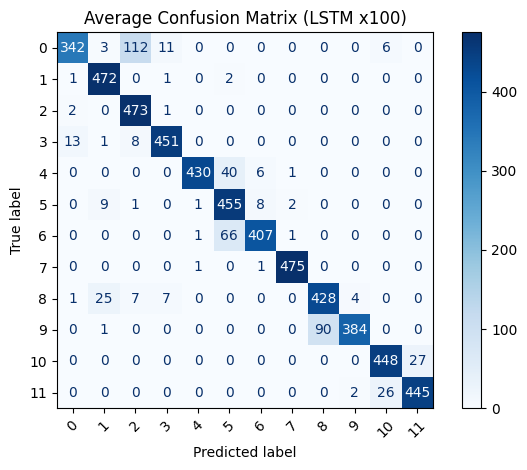

In [73]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

lstm1_cm_avg = lstm1_cm_sum // 100
disp = ConfusionMatrixDisplay(confusion_matrix=lstm1_cm_avg)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Average Confusion Matrix (LSTM x100)")
plt.tight_layout()
plt.show()


### 2. GRU

In [95]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# ÏãúÎìú Í≥†Ï†ï
np.random.seed(42)
tf.random.set_seed(42)

# ÌÅ¥ÎûòÏä§ Ïàò
num_classes = 12

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
gru1_acc_list = []
gru1_prec_list = []
gru1_recall_list = []
gru1_f1_list = []
gru1_cm_sum = np.zeros((num_classes, num_classes), dtype=int)

# EarlyStopping ÏÑ§Ï†ï
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    mode='min',
    verbose=0
)

# üîÅ GRU 100Ìöå Î∞òÎ≥µ ÌïôÏäµ
for i in range(100):
    gru1 = Sequential()
    gru1.add(GRU(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    gru1.add(Dropout(0.3))
    gru1.add(GRU(32))
    gru1.add(Dropout(0.3))
    gru1.add(Dense(32, activation='relu'))
    gru1.add(Dense(num_classes, activation='softmax'))

    gru1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    gru1.fit(X_train, y_act_train,
             epochs=50,
             batch_size=64,
             validation_split=0.2,
             callbacks=[early_stop],
             verbose=0)

    # ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
    y_pred_gru1 = np.argmax(gru1.predict(X_test, verbose=0), axis=1)

    gru1_acc_list.append(accuracy_score(y_act_test, y_pred_gru1))
    gru1_prec_list.append(precision_score(y_act_test, y_pred_gru1, average='macro', zero_division=0))
    gru1_recall_list.append(recall_score(y_act_test, y_pred_gru1, average='macro', zero_division=0))
    gru1_f1_list.append(f1_score(y_act_test, y_pred_gru1, average='macro', zero_division=0))

    # confusion matrix ÎàÑÏ†Å
    gru1_cm_sum += confusion_matrix(y_act_test, y_pred_gru1)

print("‚úÖ GRU Î™®Îç∏ 100Ìöå ÌïôÏäµ ÏôÑÎ£å!")

‚úÖ GRU Î™®Îç∏ 100Ìöå ÌïôÏäµ ÏôÑÎ£å!


üìä GRU Accuracy : 0.9109 ¬± 0.0121
üìä GRU Precision: 0.9206 ¬± 0.0093
üìä GRU Recall   : 0.9108 ¬± 0.0121
üìä GRU F1-score : 0.9106 ¬± 0.0122


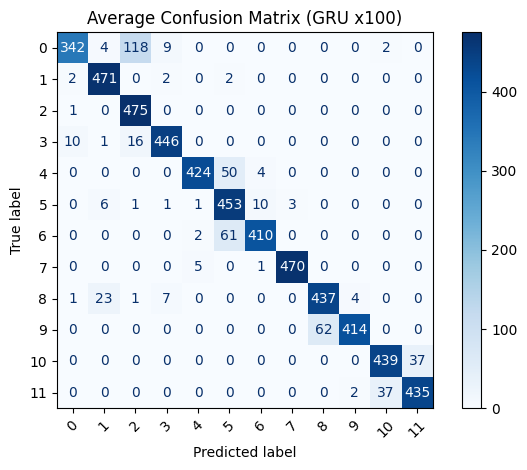

In [96]:
# ÌèâÍ∑† ÏßÄÌëú Ï∂úÎ†•
print("üìä GRU Accuracy : {:.4f} ¬± {:.4f}".format(np.mean(gru1_acc_list), np.std(gru1_acc_list)))
print("üìä GRU Precision: {:.4f} ¬± {:.4f}".format(np.mean(gru1_prec_list), np.std(gru1_prec_list)))
print("üìä GRU Recall   : {:.4f} ¬± {:.4f}".format(np.mean(gru1_recall_list), np.std(gru1_recall_list)))
print("üìä GRU F1-score : {:.4f} ¬± {:.4f}".format(np.mean(gru1_f1_list), np.std(gru1_f1_list)))

# ÌèâÍ∑† confusion matrix ÏãúÍ∞ÅÌôî
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

gru1_cm_avg = gru1_cm_sum // 100
ConfusionMatrixDisplay(confusion_matrix=gru1_cm_avg).plot(cmap='Blues', xticks_rotation=45)
plt.title("Average Confusion Matrix (GRU x100)")
plt.tight_layout()
plt.show()

### 3. Bi-LSTM

In [97]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# ÏãúÎìú Í≥†Ï†ï
np.random.seed(42)
tf.random.set_seed(42)

# ÌÅ¥ÎûòÏä§ Ïàò
num_classes = 12

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
bilstm1_acc_list = []
bilstm1_prec_list = []
bilstm1_recall_list = []
bilstm1_f1_list = []
bilstm1_cm_sum = np.zeros((num_classes, num_classes), dtype=int)

# EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    mode='min',
    verbose=0
)

# üîÅ 100Ìöå Î∞òÎ≥µ ÌïôÏäµ
for i in range(100):
    bilstm1 = Sequential()
    bilstm1.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
    bilstm1.add(Dropout(0.3))
    bilstm1.add(Bidirectional(LSTM(64)))
    bilstm1.add(Dropout(0.3))
    bilstm1.add(Dense(32, activation='relu'))
    bilstm1.add(Dense(num_classes, activation='softmax'))

    bilstm1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    bilstm1.fit(X_train, y_act_train,
                epochs=50,
                batch_size=64,
                validation_split=0.2,
                callbacks=[early_stop],
                verbose=0)

    y_pred_bilstm1 = np.argmax(bilstm1.predict(X_test, verbose=0), axis=1)

    bilstm1_acc_list.append(accuracy_score(y_act_test, y_pred_bilstm1))
    bilstm1_prec_list.append(precision_score(y_act_test, y_pred_bilstm1, average='macro', zero_division=0))
    bilstm1_recall_list.append(recall_score(y_act_test, y_pred_bilstm1, average='macro', zero_division=0))
    bilstm1_f1_list.append(f1_score(y_act_test, y_pred_bilstm1, average='macro', zero_division=0))

    bilstm1_cm_sum += confusion_matrix(y_act_test, y_pred_bilstm1)

print("‚úÖ Bidirectional LSTM Î™®Îç∏ 100Ìöå ÌïôÏäµ ÏôÑÎ£å!")


‚úÖ Bidirectional LSTM Î™®Îç∏ 100Ìöå ÌïôÏäµ ÏôÑÎ£å!


üìä BiLSTM Accuracy : 0.9132 ¬± 0.0122
üìä BiLSTM Precision: 0.9223 ¬± 0.0098
üìä BiLSTM Recall   : 0.9132 ¬± 0.0122
üìä BiLSTM F1-score : 0.9130 ¬± 0.0124


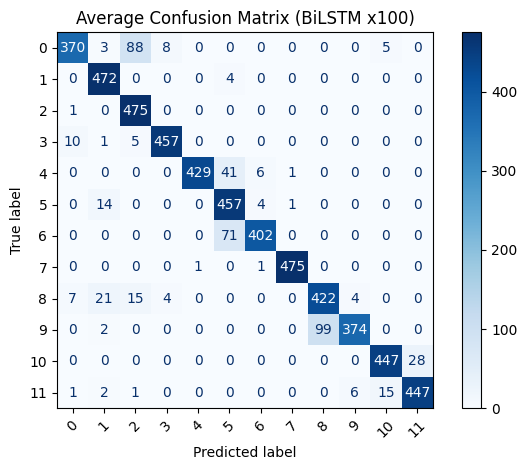

In [98]:
# ÌèâÍ∑† + ÌëúÏ§ÄÌé∏Ï∞® Ï∂úÎ†•
print("üìä BiLSTM Accuracy : {:.4f} ¬± {:.4f}".format(np.mean(bilstm1_acc_list), np.std(bilstm1_acc_list)))
print("üìä BiLSTM Precision: {:.4f} ¬± {:.4f}".format(np.mean(bilstm1_prec_list), np.std(bilstm1_prec_list)))
print("üìä BiLSTM Recall   : {:.4f} ¬± {:.4f}".format(np.mean(bilstm1_recall_list), np.std(bilstm1_recall_list)))
print("üìä BiLSTM F1-score : {:.4f} ¬± {:.4f}".format(np.mean(bilstm1_f1_list), np.std(bilstm1_f1_list)))

# ÌèâÍ∑† confusion matrix ÏãúÍ∞ÅÌôî
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

bilstm1_cm_avg = bilstm1_cm_sum // 100
ConfusionMatrixDisplay(confusion_matrix=bilstm1_cm_avg).plot(cmap='Blues', xticks_rotation=45)
plt.title("Average Confusion Matrix (BiLSTM x100)")
plt.tight_layout()
plt.show()


### 4. Bi-GRU

In [78]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# ÏãúÎìú Í≥†Ï†ï
np.random.seed(42)
tf.random.set_seed(42)

# ÌÅ¥ÎûòÏä§ Ïàò
num_classes = 12

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
bigru1_acc_list = []
bigru1_prec_list = []
bigru1_recall_list = []
bigru1_f1_list = []
bigru1_cm_sum = np.zeros((num_classes, num_classes), dtype=int)

# EarlyStopping ÏÑ§Ï†ï
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    mode='min',
    verbose=0
)

# üîÅ Bidirectional GRU 100Ìöå Î∞òÎ≥µ ÌïôÏäµ
for i in range(100):
    bigru1 = Sequential()
    bigru1.add(Bidirectional(GRU(128, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
    bigru1.add(Dropout(0.3))
    bigru1.add(Bidirectional(GRU(64)))
    bigru1.add(Dropout(0.3))
    bigru1.add(Dense(32, activation='relu'))
    bigru1.add(Dense(num_classes, activation='softmax'))

    bigru1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    bigru1.fit(X_train, y_act_train,
               epochs=50,
               batch_size=64,
               validation_split=0.2,
               callbacks=[early_stop],
               verbose=0)

    y_pred_bigru1 = np.argmax(bigru1.predict(X_test, verbose=0), axis=1)

    bigru1_acc_list.append(accuracy_score(y_act_test, y_pred_bigru1))
    bigru1_prec_list.append(precision_score(y_act_test, y_pred_bigru1, average='macro', zero_division=0))
    bigru1_recall_list.append(recall_score(y_act_test, y_pred_bigru1, average='macro', zero_division=0))
    bigru1_f1_list.append(f1_score(y_act_test, y_pred_bigru1, average='macro', zero_division=0))

    bigru1_cm_sum += confusion_matrix(y_act_test, y_pred_bigru1)

print("‚úÖ Bidirectional GRU Î™®Îç∏ 100Ìöå ÌïôÏäµ ÏôÑÎ£å!")

‚úÖ Bidirectional GRU Î™®Îç∏ 100Ìöå ÌïôÏäµ ÏôÑÎ£å!


üìä BiGRU Accuracy : 0.9201 ¬± 0.0134
üìä BiGRU Precision: 0.9283 ¬± 0.0107
üìä BiGRU Recall   : 0.9200 ¬± 0.0134
üìä BiGRU F1-score : 0.9201 ¬± 0.0133


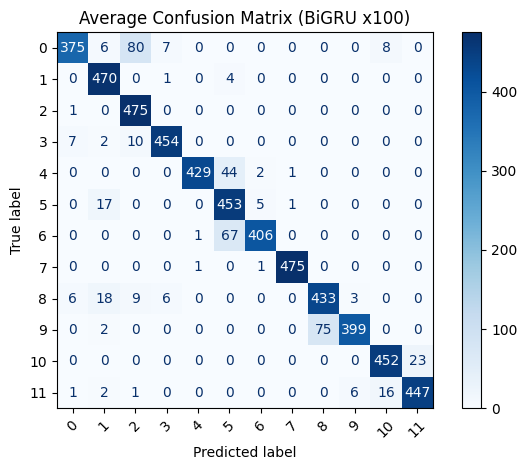

In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# ÌèâÍ∑† Î∞è ÌëúÏ§ÄÌé∏Ï∞®
print("üìä BiGRU Accuracy : {:.4f} ¬± {:.4f}".format(np.mean(bigru1_acc_list), np.std(bigru1_acc_list)))
print("üìä BiGRU Precision: {:.4f} ¬± {:.4f}".format(np.mean(bigru1_prec_list), np.std(bigru1_prec_list)))
print("üìä BiGRU Recall   : {:.4f} ¬± {:.4f}".format(np.mean(bigru1_recall_list), np.std(bigru1_recall_list)))
print("üìä BiGRU F1-score : {:.4f} ¬± {:.4f}".format(np.mean(bigru1_f1_list), np.std(bigru1_f1_list)))

# ÌèâÍ∑† confusion matrix ÏãúÍ∞ÅÌôî
bigru1_cm_avg = bigru1_cm_sum // 100
ConfusionMatrixDisplay(confusion_matrix=bigru1_cm_avg).plot(cmap='Blues', xticks_rotation=45)
plt.title("Average Confusion Matrix (BiGRU x100)")
plt.tight_layout()
plt.show()

## Model Training - Same Location

### 1. LSTM

In [80]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# ÏãúÎìú Í≥†Ï†ï
np.random.seed(42)
tf.random.set_seed(42)

# ÌÅ¥ÎûòÏä§ Ïàò
num_classes = 12

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
lstm2_acc_list = []
lstm2_prec_list = []
lstm2_recall_list = []
lstm2_f1_list = []
lstm2_cm_sum = np.zeros((num_classes, num_classes), dtype=int)

# EarlyStopping ÏÑ§Ï†ï
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    mode='min',
    verbose=0
)

# üîÅ LSTM2 100Ìöå Î∞òÎ≥µ ÌïôÏäµ (X_nogry_train ÏÇ¨Ïö©)
for i in range(100):
    lstm2 = Sequential()
    lstm2.add(LSTM(128, input_shape=(X_nogry_train.shape[1], X_nogry_train.shape[2]), return_sequences=True))
    lstm2.add(Dropout(0.3))
    lstm2.add(LSTM(64))
    lstm2.add(Dropout(0.3))
    lstm2.add(Dense(32, activation='relu'))
    lstm2.add(Dense(num_classes, activation='softmax'))

    lstm2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    lstm2.fit(X_nogry_train, y_act_train,
              epochs=50,
              batch_size=64,
              validation_split=0.2,
              callbacks=[early_stop],
              verbose=0)

    y_pred_lstm2 = np.argmax(lstm2.predict(X_nogry_test, verbose=0), axis=1)

    lstm2_acc_list.append(accuracy_score(y_act_test, y_pred_lstm2))
    lstm2_prec_list.append(precision_score(y_act_test, y_pred_lstm2, average='macro', zero_division=0))
    lstm2_recall_list.append(recall_score(y_act_test, y_pred_lstm2, average='macro', zero_division=0))
    lstm2_f1_list.append(f1_score(y_act_test, y_pred_lstm2, average='macro', zero_division=0))

    lstm2_cm_sum += confusion_matrix(y_act_test, y_pred_lstm2)

print("‚úÖ LSTM2 Î™®Îç∏ 100Ìöå ÌïôÏäµ ÏôÑÎ£å (X_nogry Í∏∞Î∞ò)")

‚úÖ LSTM2 Î™®Îç∏ 100Ìöå ÌïôÏäµ ÏôÑÎ£å (X_nogry Í∏∞Î∞ò)


üìä LSTM2 Accuracy : 0.8750 ¬± 0.0141
üìä LSTM2 Precision: 0.8874 ¬± 0.0120
üìä LSTM2 Recall   : 0.8750 ¬± 0.0141
üìä LSTM2 F1-score : 0.8754 ¬± 0.0142


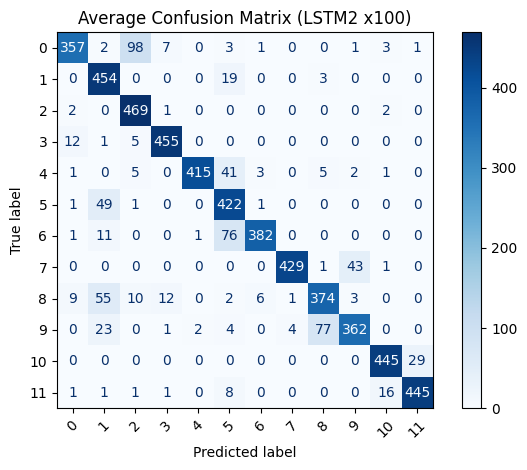

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# üìä ÌèâÍ∑† + ÌëúÏ§ÄÌé∏Ï∞® Ï∂úÎ†•
print("üìä LSTM2 Accuracy : {:.4f} ¬± {:.4f}".format(np.mean(lstm2_acc_list), np.std(lstm2_acc_list)))
print("üìä LSTM2 Precision: {:.4f} ¬± {:.4f}".format(np.mean(lstm2_prec_list), np.std(lstm2_prec_list)))
print("üìä LSTM2 Recall   : {:.4f} ¬± {:.4f}".format(np.mean(lstm2_recall_list), np.std(lstm2_recall_list)))
print("üìä LSTM2 F1-score : {:.4f} ¬± {:.4f}".format(np.mean(lstm2_f1_list), np.std(lstm2_f1_list)))

# üìà ÌèâÍ∑† Confusion Matrix ÏãúÍ∞ÅÌôî
lstm2_cm_avg = lstm2_cm_sum // 100

disp = ConfusionMatrixDisplay(confusion_matrix=lstm2_cm_avg)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Average Confusion Matrix (LSTM2 x100)")
plt.tight_layout()
plt.show()

### 2. GRU

In [82]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# ÏãúÎìú Í≥†Ï†ï
np.random.seed(42)
tf.random.set_seed(42)

# ÌÅ¥ÎûòÏä§ Ïàò
num_classes = 12

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
gru2_acc_list = []
gru2_prec_list = []
gru2_recall_list = []
gru2_f1_list = []
gru2_cm_sum = np.zeros((num_classes, num_classes), dtype=int)

# EarlyStopping ÏÑ§Ï†ï
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    mode='min',
    verbose=0
)

# üîÅ GRU2 100Ìöå Î∞òÎ≥µ ÌïôÏäµ
for i in range(100):
    gru2 = Sequential()
    gru2.add(GRU(128, input_shape=(X_nogry_train.shape[1], X_nogry_train.shape[2]), return_sequences=True))
    gru2.add(Dropout(0.3))
    gru2.add(GRU(64))
    gru2.add(Dropout(0.3))
    gru2.add(Dense(32, activation='relu'))
    gru2.add(Dense(num_classes, activation='softmax'))

    gru2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    gru2.fit(X_nogry_train, y_act_train,
             epochs=50,
             batch_size=64,
             validation_split=0.2,
             callbacks=[early_stop],
             verbose=0)

    y_pred_gru2 = np.argmax(gru2.predict(X_nogry_test, verbose=0), axis=1)

    gru2_acc_list.append(accuracy_score(y_act_test, y_pred_gru2))
    gru2_prec_list.append(precision_score(y_act_test, y_pred_gru2, average='macro', zero_division=0))
    gru2_recall_list.append(recall_score(y_act_test, y_pred_gru2, average='macro', zero_division=0))
    gru2_f1_list.append(f1_score(y_act_test, y_pred_gru2, average='macro', zero_division=0))

    gru2_cm_sum += confusion_matrix(y_act_test, y_pred_gru2)

print("‚úÖ GRU2 Î™®Îç∏ 100Ìöå ÌïôÏäµ ÏôÑÎ£å (X_nogry Í∏∞Î∞ò)")

‚úÖ GRU2 Î™®Îç∏ 100Ìöå ÌïôÏäµ ÏôÑÎ£å (X_nogry Í∏∞Î∞ò)


üìä GRU2 Accuracy : 0.8691 ¬± 0.0157
üìä GRU2 Precision: 0.8827 ¬± 0.0127
üìä GRU2 Recall   : 0.8691 ¬± 0.0157
üìä GRU2 F1-score : 0.8698 ¬± 0.0156


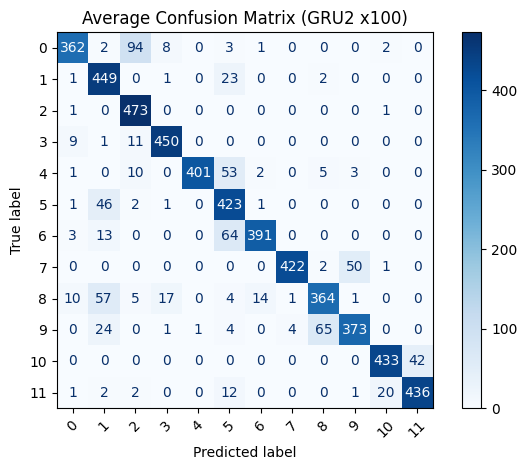

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# ÌèâÍ∑† Î∞è ÌëúÏ§ÄÌé∏Ï∞® Ï∂úÎ†•
print("üìä GRU2 Accuracy : {:.4f} ¬± {:.4f}".format(np.mean(gru2_acc_list), np.std(gru2_acc_list)))
print("üìä GRU2 Precision: {:.4f} ¬± {:.4f}".format(np.mean(gru2_prec_list), np.std(gru2_prec_list)))
print("üìä GRU2 Recall   : {:.4f} ¬± {:.4f}".format(np.mean(gru2_recall_list), np.std(gru2_recall_list)))
print("üìä GRU2 F1-score : {:.4f} ¬± {:.4f}".format(np.mean(gru2_f1_list), np.std(gru2_f1_list)))

# Confusion Matrix ÏãúÍ∞ÅÌôî
gru2_cm_avg = gru2_cm_sum // 100
ConfusionMatrixDisplay(confusion_matrix=gru2_cm_avg).plot(cmap='Blues', xticks_rotation=45)
plt.title("Average Confusion Matrix (GRU2 x100)")
plt.tight_layout()
plt.show()


### 3. Bi-LSTM

In [84]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# ÏãúÎìú Í≥†Ï†ï
np.random.seed(42)
tf.random.set_seed(42)

# ÌÅ¥ÎûòÏä§ Ïàò
num_classes = 12

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
bilstm2_acc_list = []
bilstm2_prec_list = []
bilstm2_recall_list = []
bilstm2_f1_list = []
bilstm2_cm_sum = np.zeros((num_classes, num_classes), dtype=int)

# EarlyStopping ÏÑ§Ï†ï
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    mode='min',
    verbose=0
)

# üîÅ BiLSTM2 100Ìöå Î∞òÎ≥µ ÌïôÏäµ (X_nogry Í∏∞Î∞ò)
for i in range(100):
    bilstm2 = Sequential()
    bilstm2.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(X_nogry_train.shape[1], X_nogry_train.shape[2])))
    bilstm2.add(Dropout(0.3))
    bilstm2.add(Bidirectional(LSTM(64)))
    bilstm2.add(Dropout(0.3))
    bilstm2.add(Dense(32, activation='relu'))
    bilstm2.add(Dense(num_classes, activation='softmax'))

    bilstm2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    bilstm2.fit(X_nogry_train, y_act_train,
                epochs=50,
                batch_size=64,
                validation_split=0.2,
                callbacks=[early_stop],
                verbose=0)

    y_pred_bilstm2 = np.argmax(bilstm2.predict(X_nogry_test, verbose=0), axis=1)

    bilstm2_acc_list.append(accuracy_score(y_act_test, y_pred_bilstm2))
    bilstm2_prec_list.append(precision_score(y_act_test, y_pred_bilstm2, average='macro', zero_division=0))
    bilstm2_recall_list.append(recall_score(y_act_test, y_pred_bilstm2, average='macro', zero_division=0))
    bilstm2_f1_list.append(f1_score(y_act_test, y_pred_bilstm2, average='macro', zero_division=0))

    bilstm2_cm_sum += confusion_matrix(y_act_test, y_pred_bilstm2)

print("‚úÖ BiLSTM2 Î™®Îç∏ 100Ìöå ÌïôÏäµ ÏôÑÎ£å (X_nogry Í∏∞Î∞ò)")


‚úÖ BiLSTM2 Î™®Îç∏ 100Ìöå ÌïôÏäµ ÏôÑÎ£å (X_nogry Í∏∞Î∞ò)


üìä BiLSTM2 Accuracy : 0.8785 ¬± 0.0137
üìä BiLSTM2 Precision: 0.8899 ¬± 0.0114
üìä BiLSTM2 Recall   : 0.8785 ¬± 0.0137
üìä BiLSTM2 F1-score : 0.8787 ¬± 0.0137


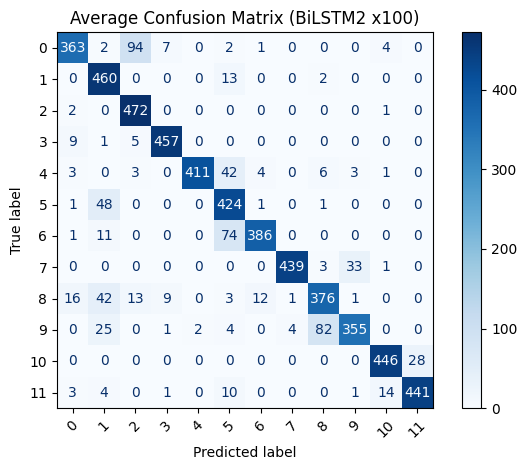

In [85]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# ÌèâÍ∑† Î∞è ÌëúÏ§ÄÌé∏Ï∞® Ï∂úÎ†•
print("üìä BiLSTM2 Accuracy : {:.4f} ¬± {:.4f}".format(np.mean(bilstm2_acc_list), np.std(bilstm2_acc_list)))
print("üìä BiLSTM2 Precision: {:.4f} ¬± {:.4f}".format(np.mean(bilstm2_prec_list), np.std(bilstm2_prec_list)))
print("üìä BiLSTM2 Recall   : {:.4f} ¬± {:.4f}".format(np.mean(bilstm2_recall_list), np.std(bilstm2_recall_list)))
print("üìä BiLSTM2 F1-score : {:.4f} ¬± {:.4f}".format(np.mean(bilstm2_f1_list), np.std(bilstm2_f1_list)))

# Confusion Matrix ÏãúÍ∞ÅÌôî
bilstm2_cm_avg = bilstm2_cm_sum // 100
ConfusionMatrixDisplay(confusion_matrix=bilstm2_cm_avg).plot(cmap='Blues', xticks_rotation=45)
plt.title("Average Confusion Matrix (BiLSTM2 x100)")
plt.tight_layout()
plt.show()


### 4. Bi-GRU

In [86]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# ÏãúÎìú Í≥†Ï†ï
np.random.seed(42)
tf.random.set_seed(42)

# ÌÅ¥ÎûòÏä§ Ïàò
num_classes = 12

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
bigru2_acc_list = []
bigru2_prec_list = []
bigru2_recall_list = []
bigru2_f1_list = []
bigru2_cm_sum = np.zeros((num_classes, num_classes), dtype=int)

# EarlyStopping ÏÑ§Ï†ï
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    mode='min',
    verbose=0
)

# üîÅ BiGRU2 100Ìöå Î∞òÎ≥µ ÌïôÏäµ
for i in range(100):
    bigru2 = Sequential()
    bigru2.add(Bidirectional(GRU(128, return_sequences=True), input_shape=(X_nogry_train.shape[1], X_nogry_train.shape[2])))
    bigru2.add(Dropout(0.3))
    bigru2.add(Bidirectional(GRU(64)))
    bigru2.add(Dropout(0.3))
    bigru2.add(Dense(32, activation='relu'))
    bigru2.add(Dense(num_classes, activation='softmax'))

    bigru2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    bigru2.fit(X_nogry_train, y_act_train,
               epochs=50,
               batch_size=64,
               validation_split=0.2,
               callbacks=[early_stop],
               verbose=0)

    y_pred_bigru2 = np.argmax(bigru2.predict(X_nogry_test, verbose=0), axis=1)

    bigru2_acc_list.append(accuracy_score(y_act_test, y_pred_bigru2))
    bigru2_prec_list.append(precision_score(y_act_test, y_pred_bigru2, average='macro', zero_division=0))
    bigru2_recall_list.append(recall_score(y_act_test, y_pred_bigru2, average='macro', zero_division=0))
    bigru2_f1_list.append(f1_score(y_act_test, y_pred_bigru2, average='macro', zero_division=0))

    bigru2_cm_sum += confusion_matrix(y_act_test, y_pred_bigru2)

print("‚úÖ BiGRU2 Î™®Îç∏ 100Ìöå ÌïôÏäµ ÏôÑÎ£å (X_nogry Í∏∞Î∞ò)")


‚úÖ BiGRU2 Î™®Îç∏ 100Ìöå ÌïôÏäµ ÏôÑÎ£å (X_nogry Í∏∞Î∞ò)


üìä BiGRU2 Accuracy : 0.8804 ¬± 0.0138
üìä BiGRU2 Precision: 0.8923 ¬± 0.0114
üìä BiGRU2 Recall   : 0.8804 ¬± 0.0138
üìä BiGRU2 F1-score : 0.8810 ¬± 0.0138


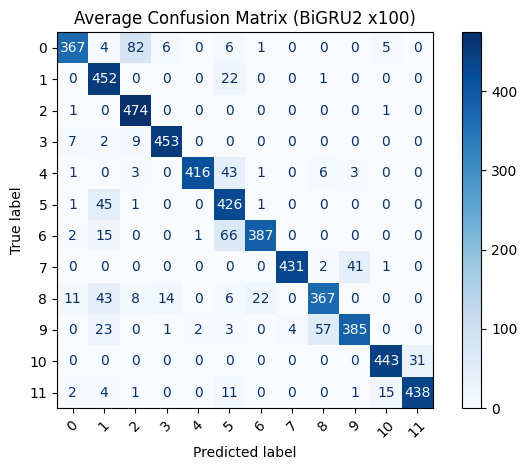

In [87]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

print("üìä BiGRU2 Accuracy : {:.4f} ¬± {:.4f}".format(np.mean(bigru2_acc_list), np.std(bigru2_acc_list)))
print("üìä BiGRU2 Precision: {:.4f} ¬± {:.4f}".format(np.mean(bigru2_prec_list), np.std(bigru2_prec_list)))
print("üìä BiGRU2 Recall   : {:.4f} ¬± {:.4f}".format(np.mean(bigru2_recall_list), np.std(bigru2_recall_list)))
print("üìä BiGRU2 F1-score : {:.4f} ¬± {:.4f}".format(np.mean(bigru2_f1_list), np.std(bigru2_f1_list)))

bigru2_cm_avg = bigru2_cm_sum // 100
ConfusionMatrixDisplay(confusion_matrix=bigru2_cm_avg).plot(cmap='Blues', xticks_rotation=45)
plt.title("Average Confusion Matrix (BiGRU2 x100)")
plt.tight_layout()
plt.show()


In [101]:
import pickle

# ÏòàÏãúÏö©ÏúºÎ°ú lstm1Îßå ÎÑ£ÏóàÏßÄÎßå, ÎÇòÎ®∏ÏßÄ Î™®Îç∏Îì§ÎèÑ ÎòëÍ∞ôÏù¥ ÌôïÏû•Ìï¥ÏÑú ÎÑ£ÏúºÎ©¥ Îê©ÎãàÎã§.
results = {
    'lstm1': {
        'accuracy': lstm1_acc_list,
        'precision': lstm1_prec_list,
        'recall': lstm1_recall_list,
        'f1_score': lstm1_f1_list,
        'confusion_matrix_sum': lstm1_cm_sum
    },
    'lstm2': {
        'accuracy': lstm2_acc_list,
        'precision': lstm2_prec_list,
        'recall': lstm2_recall_list,
        'f1_score': lstm2_f1_list,
        'confusion_matrix_sum': lstm2_cm_sum
    },
    'gru1': {
        'accuracy': gru1_acc_list,
        'precision': gru1_prec_list,
        'recall': gru1_recall_list,
        'f1_score': gru1_f1_list,
        'confusion_matrix_sum': gru1_cm_sum
    },
    'gru2': {
        'accuracy': gru2_acc_list,
        'precision': gru2_prec_list,
        'recall': gru2_recall_list,
        'f1_score': gru2_f1_list,
        'confusion_matrix_sum': gru2_cm_sum
    },
    'bilstm1': {
        'accuracy': bilstm1_acc_list,
        'precision': bilstm1_prec_list,
        'recall': bilstm1_recall_list,
        'f1_score': bilstm1_f1_list,
        'confusion_matrix_sum': bilstm1_cm_sum
    },
    'bilstm2': {
        'accuracy': bilstm2_acc_list,
        'precision': bilstm2_prec_list,
        'recall': bilstm2_recall_list,
        'f1_score': bilstm2_f1_list,
        'confusion_matrix_sum': bilstm2_cm_sum
    },
    'bigru1': {
        'accuracy': bigru1_acc_list,
        'precision': bigru1_prec_list,
        'recall': bigru1_recall_list,
        'f1_score': bigru1_f1_list,
        'confusion_matrix_sum': bigru1_cm_sum
    },
    'bigru2': {
        'accuracy': bigru2_acc_list,
        'precision': bigru2_prec_list,
        'recall': bigru2_recall_list,
        'f1_score': bigru2_f1_list,
        'confusion_matrix_sum': bigru2_cm_sum
    },
}

# ÌååÏùºÎ°ú Ï†ÄÏû•
with open('between_metrics_results.pkl', 'wb') as f:
    pickle.dump(results, f)

print("‚úÖ Î™®Îì† Î™®Îç∏ Í≤∞Í≥ºÍ∞Ä between_metrics_results.pkl ÌååÏùºÏóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

‚úÖ Î™®Îì† Î™®Îç∏ Í≤∞Í≥ºÍ∞Ä between_metrics_results.pkl ÌååÏùºÏóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


In [102]:
with open('between_metrics_results.pkl', 'rb') as f:
    results = pickle.load(f)

# ÏòàÏãú: lstm1Ïùò ÌèâÍ∑† accuracy ÌôïÏù∏
print("LSTM1 ÌèâÍ∑† Ï†ïÌôïÎèÑ:", len(results['lstm2']['confusion_matrix_sum']))

LSTM1 ÌèâÍ∑† Ï†ïÌôïÎèÑ: 12
